In [45]:
import numpy as np
import pandas as pd

import h5py
import matplotlib.pyplot as plt

In [70]:
#Get the indices for tracks from the 5313 tracks have "lung" in the description
targets_txt = 'https://raw.githubusercontent.com/calico/basenji/master/manuscripts/cross2020/targets_human.txt'
df = pd.read_csv(targets_txt, sep='\t')

new_df = pd.DataFrame()

#Create a new df with only the index column and description col from prev df. Split the df into exp_type and cell_type_desc columns 
for i in range(0, len(df)):
    description = df["description"][i]
    exp_type = description.split(':', 1)[0]
    cell_type_desc = description.split(':', 1)[1]

    new_df.loc[i, "index"] = df["index"][i]
    new_df.loc[i, "expt_type"] = exp_type
    new_df.loc[i, "cell_type_desc"] = cell_type_desc

print(len(new_df))
lung_dnase_indices = new_df.index[new_df['cell_type_desc'].str.contains("lung") & new_df["expt_type"].str.contains("DNASE")].tolist()
lung_cage_indices = new_df.index[new_df['cell_type_desc'].str.contains("lung") & new_df["expt_type"].str.contains("CAGE")].tolist()

neutro_chip_indices = new_df.index[new_df['cell_type_desc'].str.contains("neutrophil") & new_df["expt_type"].str.contains("CHIP")].tolist()
neutro_cage_indices = new_df.index[new_df['cell_type_desc'].str.contains("neutrophil") & new_df["expt_type"].str.contains("CAGE")].tolist()

tcell_dnase_indices = new_df.index[new_df['cell_type_desc'].str.contains("T cell") & new_df["expt_type"].str.contains("DNASE")].tolist()
tcell_cage_indices = new_df.index[new_df['cell_type_desc'].str.contains("T cell") & new_df["expt_type"].str.contains("CAGE")].tolist()
tcell_chip_indices = new_df.index[new_df['cell_type_desc'].str.contains("T cell") & new_df["expt_type"].str.contains("CHIP")].tolist()

# lung_dnase = new_df.index[new_df['cell_type_desc'].str.contains("lung") & new_df["expt_type"].str.contains("DNASE")].tolist()
# lung_chip = new_df.index[new_df['cell_type_desc'].str.contains("lung") & new_df["expt_type"].str.contains("CHIP")].tolist()
# lung_atac = new_df.index[new_df['cell_type_desc'].str.contains("lung") & new_df["expt_type"].str.contains("ATAC")].tolist()
# lung_cage = new_df.index[new_df['cell_type_desc'].str.contains("lung") & new_df["expt_type"].str.contains("CAGE")].tolist()

# lung_dnase = new_df.index[new_df['cell_type_desc'].str.contains("lung") & new_df["expt_type"].str.contains("DNASE")].tolist()
# lung_chip = new_df.index[new_df['cell_type_desc'].str.contains("lung") & new_df["expt_type"].str.contains("CHIP")].tolist()
# lung_atac = new_df.index[new_df['cell_type_desc'].str.contains("lung") & new_df["expt_type"].str.contains("ATAC")].tolist()
# lung_cage = new_df.index[new_df['cell_type_desc'].str.contains("lung") & new_df["expt_type"].str.contains("CAGE")].tolist()

print(len(lung_dnase_indices), len(lung_cage_indices), len(neutro_chip_indices), len(neutro_cage_indices))
print(len(tcell_dnase_indices), len(tcell_cage_indices), len(tcell_chip_indices))

5313
42 16 12 1
13 11 86 0


In [69]:
filepath = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/refGenomeEnformerOutput.h5py"

with h5py.File(filepath, 'r') as f:
    lung_dnase_tracks = f["refGenomeEnformerOutputs"][0:444415, lung_dnase_indices]
    lung_cage_tracks = f["refGenomeEnformerOutputs"][0:444415, lung_cage_indices]

with h5py.File(filepath, 'r') as f:
    neutro_chip_tracks = f["refGenomeEnformerOutputs"][0:444415, neutro_chip_indices]
    neutro_cage_tracks = f["refGenomeEnformerOutputs"][0:444415, neutro_cage_indices]

In [71]:
with h5py.File(filepath, 'r') as f:
    tcell_dnase_tracks = f["refGenomeEnformerOutputs"][0:444415, tcell_dnase_indices]
    tcell_chip_tracks = f["refGenomeEnformerOutputs"][0:444415, tcell_chip_indices]
    tcell_cage_tracks = f["refGenomeEnformerOutputs"][0:444415, tcell_cage_indices]

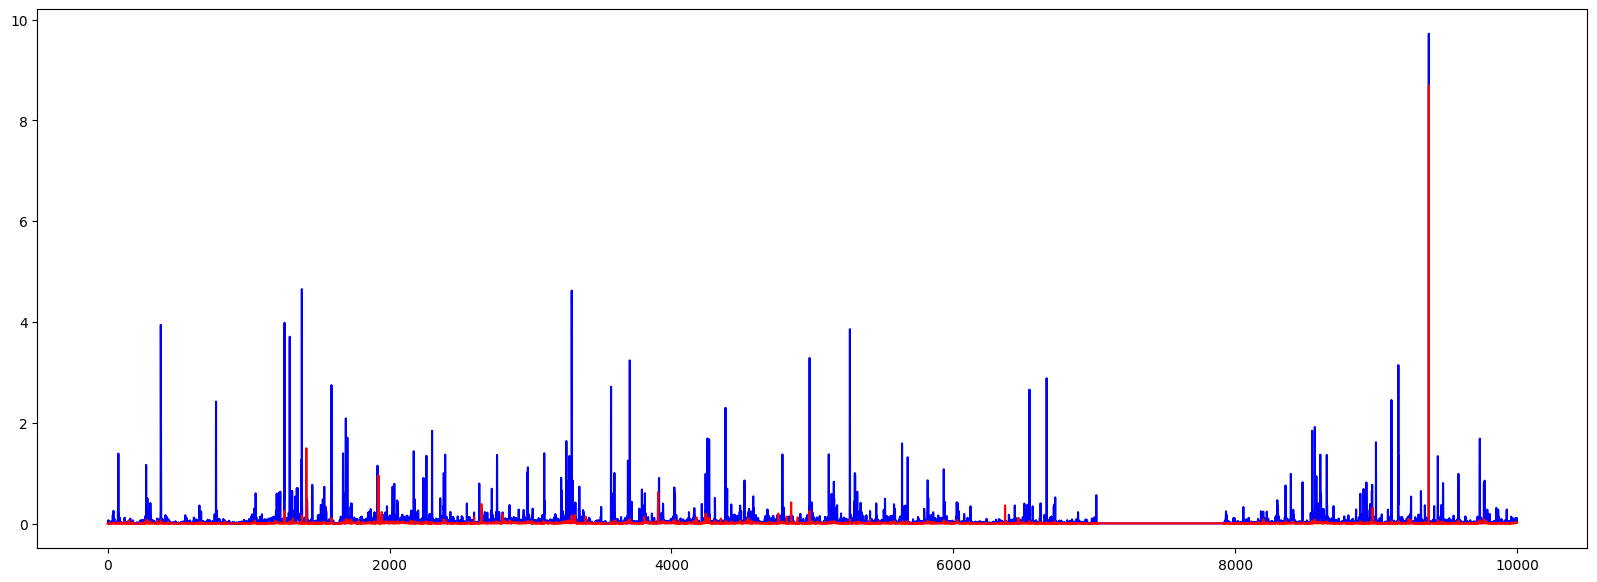

In [75]:
lung_cell_type = new_df.loc[lung_cage_indices[0], "cell_type_desc"]
neutrophil_cell_type = new_df.loc[neutro_cage_indices[0], "cell_type_desc"]
plt.figure(figsize=(20, 7))
plt.plot(lung_cage_tracks[10000:20000, 0], label=lung_cell_type, color='blue')
plt.plot(neutro_cage_tracks[10000:20000, 0], label=neutrophil_cell_type, color='red')
plt.show()

lung microvascular endothelial cell female
naive thymus-derived CD4-positive, alpha-beta T cell male adult (26 years)


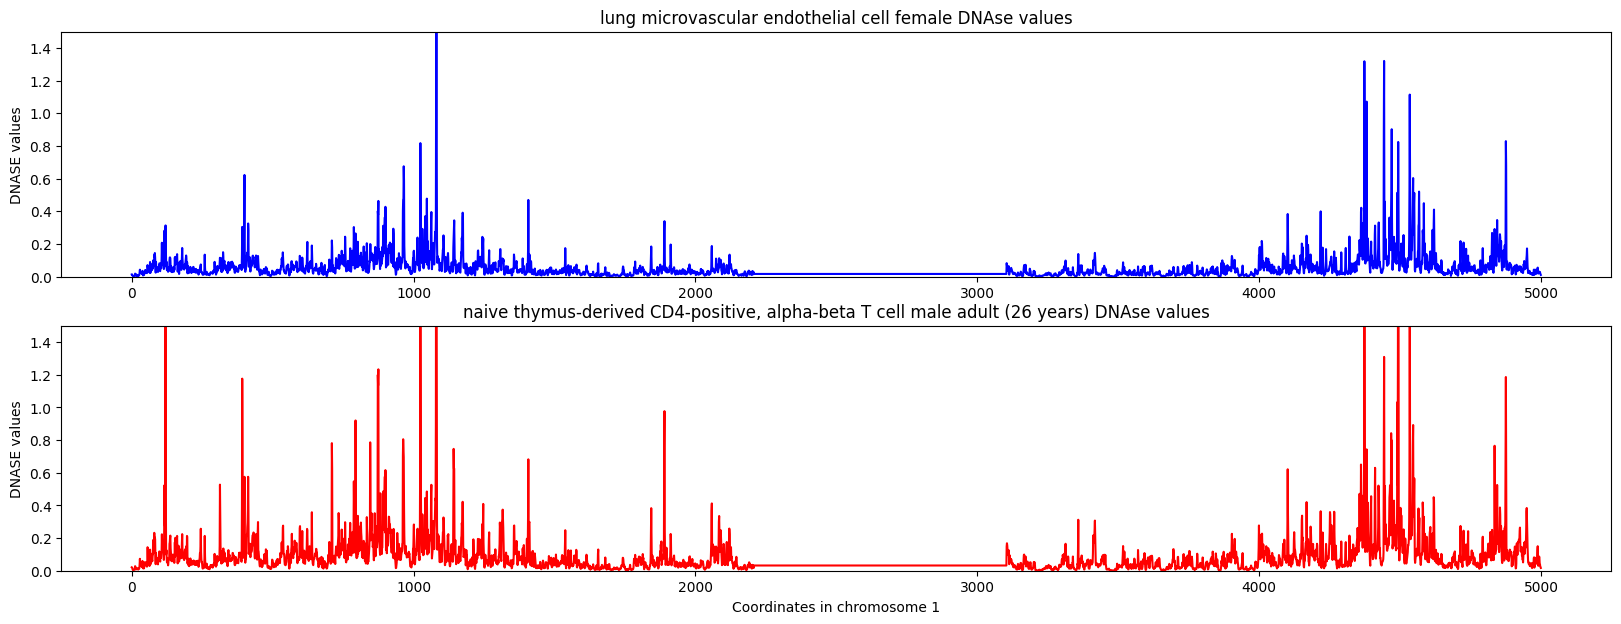

In [85]:
lung_cell_type = new_df.loc[lung_dnase_indices[0], "cell_type_desc"]
tcell_cell_type = new_df.loc[tcell_dnase_indices[0], "cell_type_desc"]
print(lung_cell_type)
print(tcell_cell_type)

plt.figure(figsize=(20, 7))

plt.subplot(2, 1, 1)
plt.plot(lung_dnase_tracks[220000:225000, 0], label=lung_cell_type, color='blue')
plt.ylabel("DNASE values")
plt.title("lung microvascular endothelial cell female DNAse values")
plt.ylim(0, 1.5)

plt.subplot(2, 1, 2)
plt.plot(tcell_dnase_tracks[220000:225000, 0], label=neutrophil_cell_type, color='red')
plt.xlabel("Coordinates in chromosome 1")
plt.ylabel("DNASE values")
plt.title("naive thymus-derived CD4-positive, alpha-beta T cell male adult (26 years) DNAse values")
plt.ylim(0, 1.5)

plt.show()